<a href="https://colab.research.google.com/github/BannedMatt/FinalProject_2025_Matthew_Banawa_REMA/blob/main/FinalProject_2025_Matthew_Banawa_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing + EDA

%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project

In [4]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [5]:
print("Loading big matrix...")
interactions = pd.read_csv("data_final_project/KuaiRec 2.0/data/big_matrix.csv")

print("Loading item features...")
item_categories = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("data_final_project/KuaiRec 2.0/data/user_features.csv")

print("Loading items' daily features...")
item_daily_feat = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_daily_features.csv")

Loading big matrix...
Loading item features...
Loading user features...
Loading items' daily features...


In [6]:
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [7]:
all_feats = item_categories['feat'].explode().astype(int)

min_feat = all_feats.min()
max_feat = all_feats.max()

print("Minimum feat value:", min_feat)
print("Maximum feat value:", max_feat)

Minimum feat value: 0
Maximum feat value: 30


In [8]:
user_features.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
feat_cols = [f'onehot_feat{i}' for i in range(18)]
subset = user_features[feat_cols]

min_val = subset.min().min()
max_val = subset.max().max()

print("Minimum value across all onehot_feat columns:", min_val)
print("Maximum value across all onehot_feat columns:", max_val)

Minimum value across all onehot_feat columns: 0.0
Maximum value across all onehot_feat columns: 1075.0


the feat in item_categories and the one hot feats in user_features are definitely not the same thing. the one in item categories probably stands for genres or tags but i'm not sure about the ones in user_features

In [10]:
item_daily_feat.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


In [11]:
item_daily_feat[['video_width', 'video_height']].drop_duplicates()

,video_width,video_height
0,720,1280
63,886,1015
189,1080,1080
304,720,720
554,360,640
...,...,...
342619,642,1280
343117,721,1166
343121,1080,1022
343178,1242,1242


In [12]:
#we dont want to recommend items to a user who cant view them
item_daily_feat = item_daily_feat[item_daily_feat['visible_status'] == 'public']

In [13]:

interactions = interactions.dropna()
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["timestamp"] >= 0]
interactions = interactions.dropna(subset=['watch_ratio'])
interactions = interactions[interactions['watch_ratio'] > 0.5]
interactions = interactions[interactions['watch_ratio'] <= 5]
interactions = interactions[interactions['video_duration'] > 1000]
interactions.shape

(7319510, 8)

- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?

# Graphs

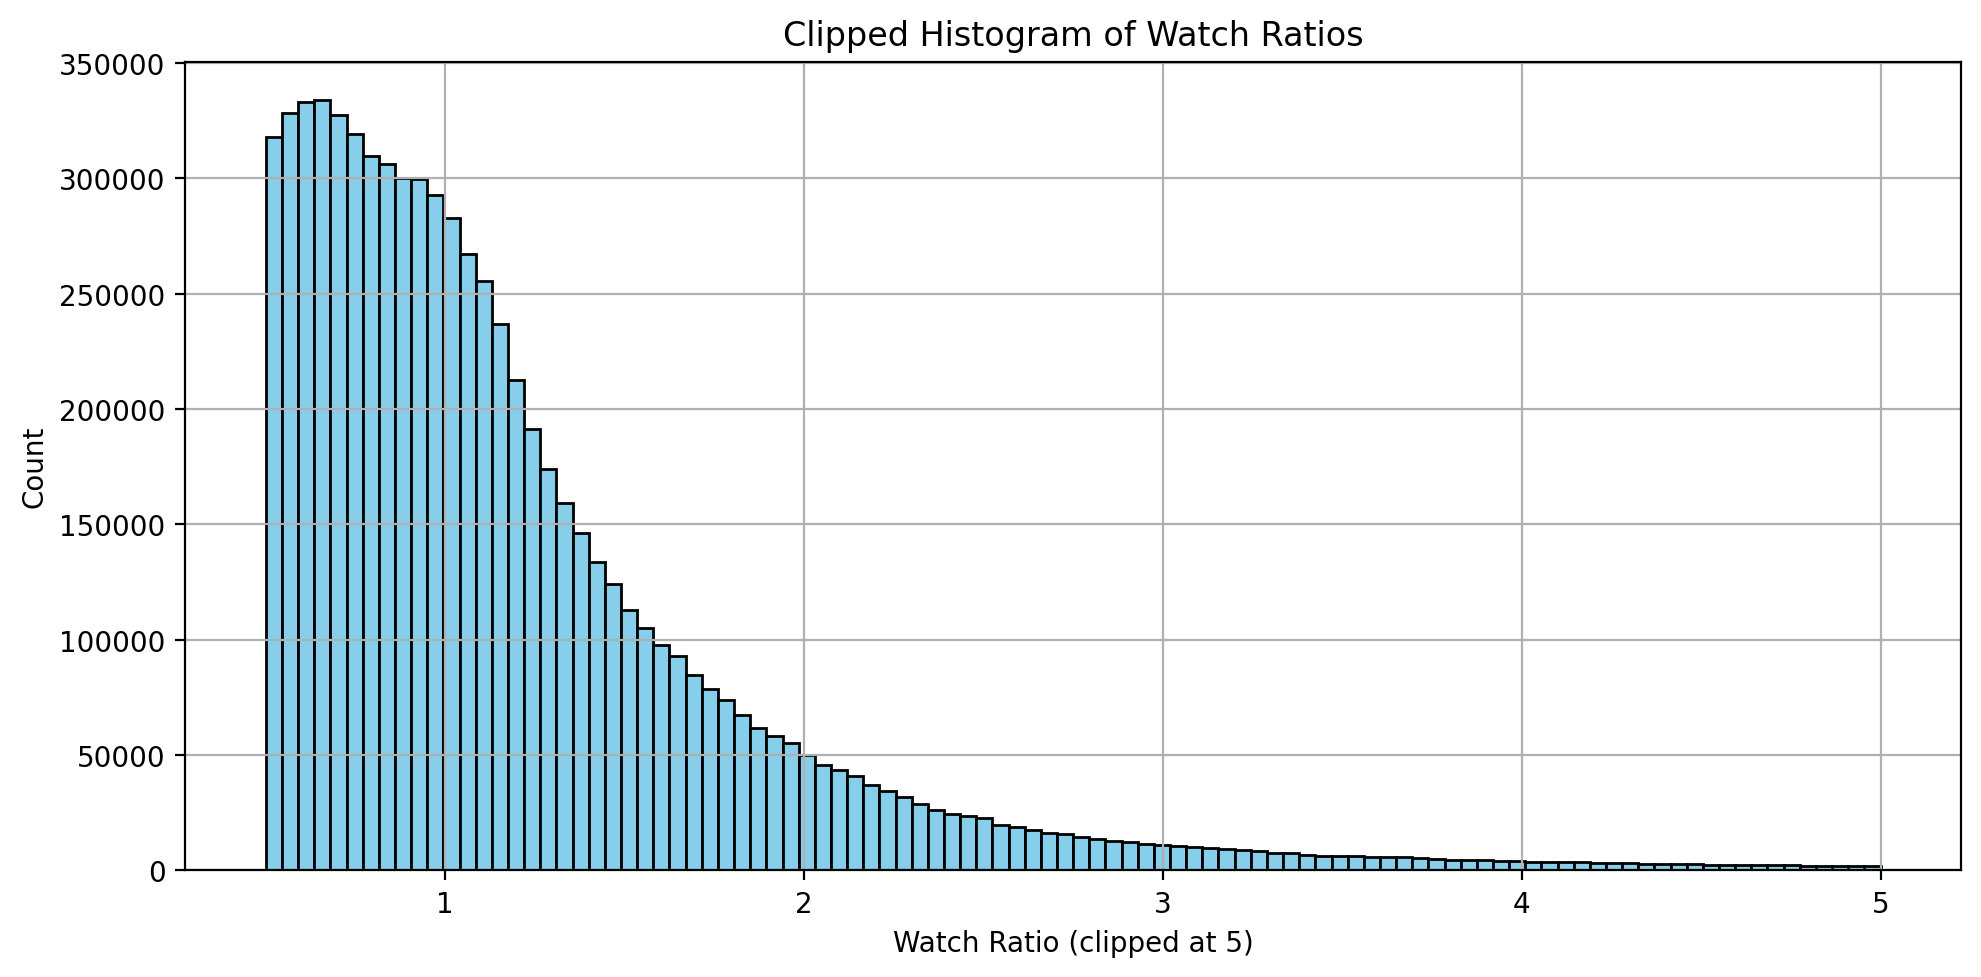

In [33]:
import matplotlib.pyplot as plt

interactions_clipped = interactions.copy()
interactions_clipped['watch_ratio'] = interactions_clipped['watch_ratio'].clip(upper=7)

plt.figure(figsize=(10, 5))
plt.hist(interactions_clipped['watch_ratio'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Clipped Histogram of Watch Ratios')
plt.xlabel('Watch Ratio (clipped at 5)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interactions per User

In [ ]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

most accounts barely have any interactions and one account has an abnormaly high amount of interactions

In [ ]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

i guess this means kuaishou app is has a popularity bias

### Temporal Analysis

In [ ]:
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)

interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(interactions["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(interactions["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = interactions["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = interactions[interactions["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = interactions.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = interactions.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

# Feature Engineering

Apps like tiktok usually recommend videos similar to the ones that a user has already watched so i think content based filtering would be a good idea. Furthermore, we should also probably use a neural network since we want to take into account each user's preferences

We create a dataframe of user vectors and another for item vectors which will be the data given to their respective neural networks

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

### STEP 1: Build user-level features from interactions + item_categories ###
# Explode item_categories
item_categories['feat'] = item_categories['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exp = item_categories.explode('feat').astype({'feat': int})

# Merge interactions with feats → get (user_id, feat, watch_ratio)
inter_feat = interactions.merge(item_cat_exp, on='video_id', how='inner')

# Aggregate avg watch_ratio per user per feat
user_feat_matrix = (
    inter_feat.groupby(['user_id', 'feat'])['watch_ratio']
    .mean().unstack(fill_value=0).rename(columns=lambda x: f'ufeat_{x}')
    .reset_index()
)

### STEP 2: Build item-level features ###
# Aggregate item stats
video_ids = interactions['video_id'].unique()
item_daily_used = item_daily_feat[item_daily_feat['video_id'].isin(video_ids)]

numerical_cols = ['video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']
item_agg = (
    item_daily_used[['video_id'] + numerical_cols]
    .groupby('video_id')
    .agg({
        'video_duration': 'first',
        'play_cnt': 'sum',
        'comment_cnt': 'sum',
        'follow_cnt': 'sum',
        'share_cnt': 'sum',
    })
    .reset_index()
)

# One-hot encode item feats
item_cat_exp = item_cat_exp[item_cat_exp['video_id'].isin(video_ids)]
item_feat_matrix = (
    pd.get_dummies(item_cat_exp['feat'], prefix='ifeat').astype(int)
    .assign(video_id=item_cat_exp['video_id'])
    .groupby('video_id').max().reset_index()
)

# Merge item stats + feat one-hot
item_features = item_feat_matrix.merge(item_agg, on='video_id', how='left')

### STEP 3: Merge all into unified full_data ###
# Start from interactions (base)
full_data = interactions[['user_id', 'video_id', 'watch_ratio']].dropna()

# Merge user features
full_data = full_data.merge(user_feat_matrix, on='user_id', how='left')

# Merge item features
full_data = full_data.merge(item_features, on='video_id', how='left')

# Drop any remaining NaNs (optional safety step)
full_data.dropna(inplace=True)

In [ ]:
# 1. y_data
scaler_target = MinMaxScaler(feature_range=(-1, 1))
y_data = scaler_target.fit_transform(full_data['watch_ratio'].values.reshape(-1, 1))

# 2. user_data and item_data
user_cols = [col for col in full_data.columns if col.startswith('ufeat_')]
item_cols = [col for col in full_data.columns if col.startswith('ifeat_') or col in numerical_cols]

# Scale input features
scaler_user = StandardScaler()
user_data = scaler_user.fit_transform(full_data[user_cols])

scaler_item = StandardScaler()
item_data = scaler_item.fit_transform(full_data[item_cols])

In [12]:
# Step 1: Explode feats inline (no need to make a full copy)
item_categories['feat'] = item_categories['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exp = item_categories.explode('feat').astype({'feat': int})

# Step 2: Merge directly with interactions (get user, video, feat, watch_ratio)
inter_feat = interactions.merge(item_cat_exp, on='video_id', how='inner')

# Step 3: Mean watch_ratio per user per feat (no intermediate resets)
user_feat_matrix = (
    inter_feat
    .groupby(['user_id', 'feat'])['watch_ratio']
    .mean()
    .unstack(fill_value=0)
    .rename(columns=lambda x: f"feat_{x}")
    .reset_index()
)

# Step 4: Create base user_data: minimal set + user features inline
user_data = (
    interactions[['user_id', 'video_id', 'watch_ratio']]
    .dropna()
    .merge(user_feat_matrix, on='user_id', how='left')
)

# Step 5: Extract y and drop from user_data
y_train = user_data[['watch_ratio']].values
user_data = user_data.drop(columns=['watch_ratio'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Take only the video_ids from user_data
video_ids = user_data[['video_id']].copy()

# Step 2: Aggregate numerical item features
cols_to_use = ['video_id', 'video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']
item_subset = item_daily_feat[cols_to_use]

item_agg_feat = item_subset.groupby('video_id').agg({
    'video_duration': 'first',
    'play_cnt': 'sum',
    'comment_cnt': 'sum',
    'follow_cnt': 'sum',
    'share_cnt': 'sum',
}).reset_index()

# Step 3: One-hot encode feat values
item_cat_exp = item_categories.copy()
item_cat_exp['feat'] = item_cat_exp['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exp = item_cat_exp.explode('feat').astype({'feat': int})

item_feat_ohe = pd.get_dummies(item_cat_exp['feat'], prefix='feat').astype(int)
item_feat_ohe['video_id'] = item_cat_exp['video_id']
item_feat_ohe = item_feat_ohe.groupby('video_id').max().reset_index()

# Step 4: Merge one-hot feats and aggregated stats
item_full = item_feat_ohe.merge(item_agg_feat, on='video_id', how='left')

# Step 5: Scale the numerical columns
numerical_cols = ['video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']
scaler_item = StandardScaler()
item_full[numerical_cols] = scaler_item.fit_transform(item_full[numerical_cols])

# Step 6: Merge back with user_data['video_id'] row-by-row to align item_data
item_data = user_data[['video_id']].merge(item_full, on='video_id', how='left')

item_data.head()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y_train = y_data.values

scaler_item = StandardScaler()
numerical_cols = ['video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']
item_data[numerical_cols] = scaler_item.fit_transform(item_data[numerical_cols])

scaler_user = StandardScaler()
feat_cols = [col for col in user_data.columns if col.startswith("feat_")]
user_data[feat_cols] = scaler_user.fit_transform(user_data[feat_cols])

scaler_target = MinMaxScaler(feature_range=(-1, 1))

user_train = user_data.drop(columns=['user_id', 'video_id'])
item_train = item_data.drop(columns=['video_id'])
y_train = scaler_target.fit_transform(y_train.reshape(-1, 1))
print(user_train.shape)
print(item_train.shape)
print(y_train.shape)

In [ ]:
from sklearn.model_selection import train_test_split
item_train, item_test = train_test_split(
    item_train, train_size=0.80, shuffle=True, random_state=1
)
user_train, user_test = train_test_split(
    user_train, train_size=0.80, shuffle=True, random_state=1
)
y_train, y_test = train_test_split(
    y_train, train_size=0.80, shuffle=True, random_state=1
)
print(f"video training data shape: {item_train.shape}")
print(f"video test data shape: {item_test.shape}")

# Model Development

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_user_features = user_train.shape[1]
num_item_features = item_train.shape[1]

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ]
)

item_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ]
)

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

In [ ]:
# [1] Model definition
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# [2] TF dataset pipeline (THIS is what you replace the old fit with)
train_ds = tf.data.Dataset.from_tensor_slices(((user_train, item_train), y_train))
train_ds = train_ds.shuffle(buffer_size=500).batch(128).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(((user_test, item_test), y_test))
val_ds = val_ds.batch(128).prefetch(tf.data.AUTOTUNE)

# [3] Model training
model.fit(train_ds, validation_data=val_ds, epochs=5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

loss, mae = model.evaluate([user_test, item_test], y_test)

print(f"Test MSE: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Recommendation Algorithm

# Evaluation